# **KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU**

---

# I. THU THẬP DỮ LIỆU

- Chủ đề dữ liệu: Student Performance Factors (Các yếu tố ảnh hưởng đến hiệu suất của học sinh)
- Nguồn dữ liệu: Dữ liệu được download từ trang web `Kaggle` dưới dạng file csv
- Link dataset: [Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

# II. KHÁM PHÁ DỮ LIỆU

Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Đọc dữ liệu từ file csv

In [3]:
df = pd.read_csv('../Data/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### 1. Dữ liệu có bao nhiêu dòng, cột? 

In [4]:
df.shape

(6607, 20)

### 2. Thông tin về các dòng dữ liệu

#### 2.1 Ý nghĩa từng dòng dữ liệu

- Mỗi dòng là thông tin về thói quen học tập, sự can thiệp của phụ huynh và các khía cạnh khác ảnh hưởng đến thành công trong học tập của một đối tượng khảo sát. 

- Không có dòng nào có ý nghĩa khác với các dòng còn lại.

#### 2.2 Kiểm tra các dòng dữ liệu trùng lặp

In [5]:
n_duplicate = df.duplicated().sum()
n_duplicate

if n_duplicate > 0:
    df.drop_duplicates()

df.shape

(6607, 20)

Qua kiểm tra, ta thấy dữ liệu không bị trùng lặp. Ta tiến hành bước tiếp theo. 

### 3. Thông tin về các cột dữ liệu

Dữ liệu có các cột sau

In [6]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

#### 3.1 Ý nghĩa của các cột dữ liệu

Theo mô tả dữ liệu trên Kaggle, mỗi cột có ý nghĩa như sau:
|Tên cột|Ý nghĩa|
|-------|-------|
| Hours_Studied| Số giờ dành cho việc học mỗi tuần|
| Attendance| Tỷ lệ phần trăm lớp học đã tham dự|
| Parental_Involvement| Mức độ tham gia của phụ huynh vào việc học tập của học sinh|
| Access_to_Resource| Khả năng tiếp cận tới các nguồn lực giáo dục|
| Extracurricular_Activities| Câu hỏi về việc có tham gia các hoạt động ngoại khóa hay không|
| Sleep_Hours| Số giờ ngủ trung bình mỗi đêm|
| Previous_Scores| Điểm trung bình của các kỳ thi trước|
| Motivation_Level| Mức độ động lực của học sinh|
| Internet_Access| Câu hỏi về khả năng có thể truy cập internet hay không|
| Tutoring_Session| Số buổi học thêm tham dự mỗi tháng|
| Family_Income| Mức thu nhập gia đình|
| Teacher_Quality| Chất lượng giáo viên|
| School_Type| Loại trường học đã theo học|
| Peer_Influence| Ảnh hưởng của bạn bè đến kết quả học tập|
| Physical_Activity| Số giờ hoạt động thể chất trung bình mỗi tuần|
| Learning_Disabilities| Câu hỏi về có khó khăn nào trong học tập hay không|
| Parental_Education_Level| Trình độ học vấn của cha mẹ|
| Distance_from_Home| Khoảng cách từ nhà đến trường |
| Gender| Giới tính của đối tượng khảo sát|
| Exam_Score| Điểm thi cuối kỳ|

#### 3.2 Kiểm tra kiểu dữ liệu của mỗi cột 

- Kiểu dữ liệu hiện tại của các cột

In [7]:
column_types = df.dtypes
column_types

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

- Nhận xét: Dữ liệu trong dataframe đã được xác định với các kiểu dữ liệu phù hợp cho từng cột.

#### 3.3 Sự phân bố dữ liệu của các cột có kiểu định lượng

Các cột có kiểu dữ liệu định lượng

In [8]:
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
print('Numberical columns: ')
for col_name in numerical_columns:
    print(col_name)

Numberical columns: 
Hours_Studied
Attendance
Sleep_Hours
Previous_Scores
Tutoring_Sessions
Physical_Activity
Exam_Score


- Sự phân bố dữ liệu của các cột\
  Từ mô tả của dữ liệu và đánh giá sơ bộ, nhóm nhận thấy rằng trong các cột này thì dữ liệu của các cột *Hours_Studied*, **Attendance**, **Previous_Scores** và **Exam_Score** là liên tục; còn dữ liệu các cột **Sleep_Hours**, **Tutoring_Sessions** và **Physical_Activity** là rời rạc. Vì vậy nhóm sẽ sử dụng 2 loại biểu đồ là `histogram` cho cột có kiểu dữ liệu liên tục và `bar chart` cho kiểu dữ liệu rời rạc để trực quan hóa phân bố giá trị của các cột này.  

In [9]:
# Danh sách các cột tương ứng với histogram và bar plot
histogram_columns = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
bar_columns = ['Tutoring_Sessions', 'Physical_Activity', 'Sleep_Hours']

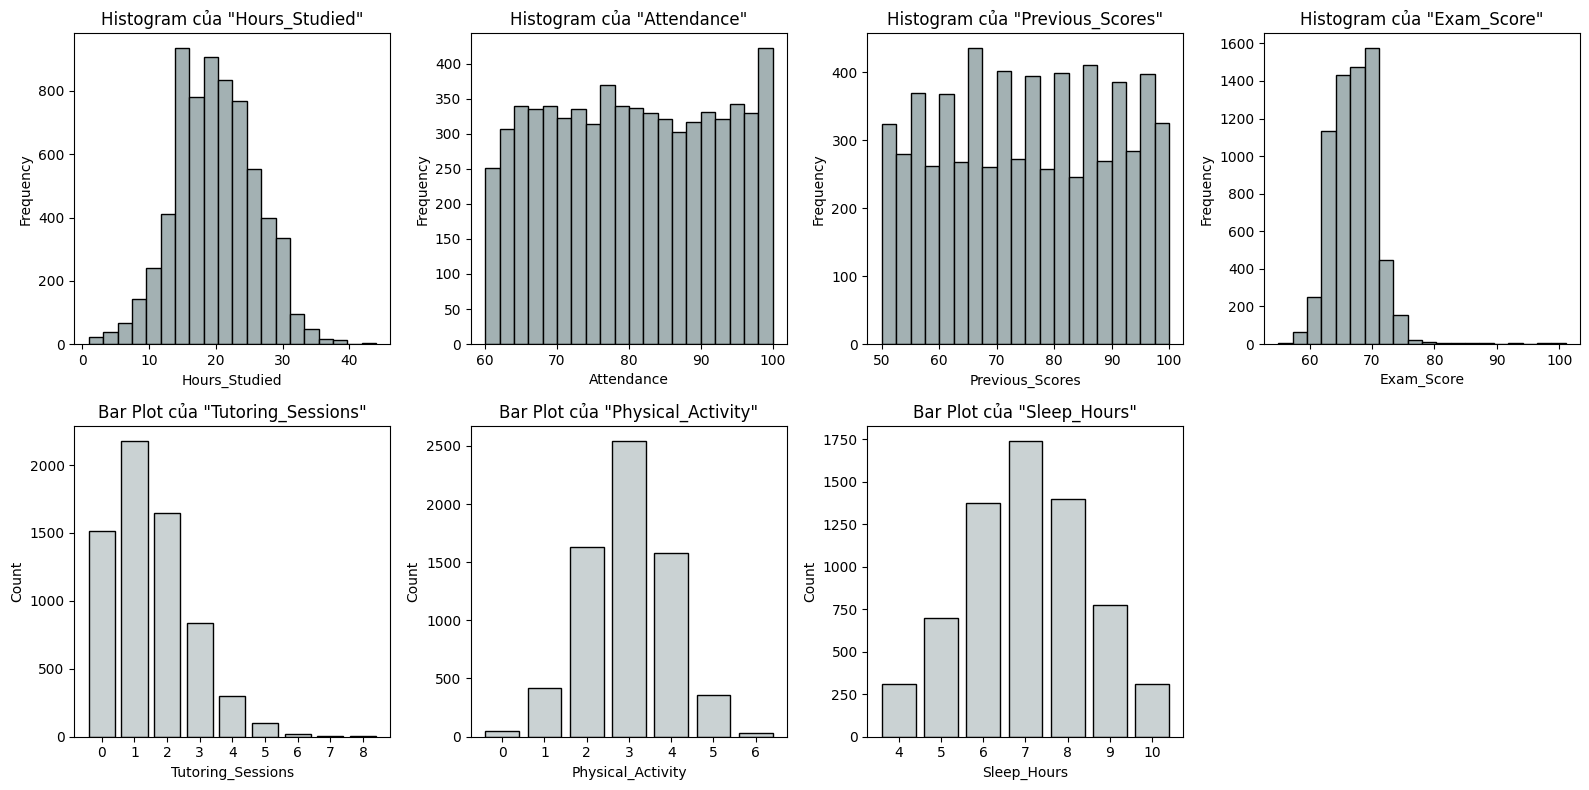

In [10]:
# Vẽ biểu đồ phân bố giá trị của các cột
numerical_fig, numerical_axes = plt.subplots(2, 4, figsize=(16, 8))

for i, col_name in enumerate(histogram_columns):
    ax = numerical_axes[i // 4, i % 4]  
    ax.hist(df[col_name].dropna(), bins=20, color = '#A3B1B3', edgecolor='black')
    ax.set_title(f'Histogram của "{col_name}"')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Frequency')

for i, col_name in enumerate(bar_columns, start=4):  
    ax = numerical_axes[i // 4, i % 4]  
    value_counts = df[col_name].value_counts().sort_index()
    ax.bar(value_counts.index, value_counts.values, color='#CAD2D3', edgecolor='black')
    ax.set_title(f'Bar Plot của "{col_name}"')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Count')
    ax.set_xticks(value_counts.index) # Đặt giới hạn trục x nếu cần để phù hợp với tất cả các giá trị

numerical_axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

##### 3.3.1 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

In [11]:
for col_name in numerical_columns:
    print(f'{col_name}: {df[col_name].isnull().mean()*100}%')

Hours_Studied: 0.0%
Attendance: 0.0%
Sleep_Hours: 0.0%
Previous_Scores: 0.0%
Tutoring_Sessions: 0.0%
Physical_Activity: 0.0%
Exam_Score: 0.0%


- Nhận xét: Dữ liệu trong các cột dữ liệu dạng định lượng (numerical columns) của dataframe không có bất kỳ giá trị nào bị thiếu. 

##### 3.3.2 Tính toán các giá trị thống kê 

Với mỗi cột có kiểu dữ liệu định lượng, chúng em thực hiện tính toán các giá trị thống kê cơ bản sau:
- Min 
- Max
- Mean
- Mod
- Median

In [12]:
# Hàm tính toán các giá trị thống kê của 1 cột
def compute_statistic(dataframe, column_name):
    Min = round(dataframe[column_name].min(), 2)
    Max = round(dataframe[column_name].max(), 2)
    Mean = round(dataframe[column_name].mean(), 2)
    Median = round(dataframe[column_name].median(), 2)
    Mod = round(dataframe[column_name].mode()[0], 2)
    
    return (Min, Max, Mean, Median, Mod)

In [13]:
# Tính toán các giá trị thống kê của tất cả các cột có kiểu dữ liệu định lượng
statistic_values = {
    'Statistic': ['min', 'max', 'mean', 'median', 'mod'],
}

for col_name in numerical_columns:
    statistic_values[col_name] = compute_statistic(df, col_name)

In [14]:
# In kết quả
numerical_df = pd.DataFrame(statistic_values)
numerical_df

,Statistic,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,min,1.00,60.00,4.00,50.00,0.00,0.00,55.00
1,max,44.00,100.00,10.00,100.00,8.00,6.00,101.00
2,mean,19.98,79.98,7.03,75.07,1.49,2.97,67.24
3,median,20.00,80.00,7.00,75.00,1.00,3.00,67.00
4,mod,20.00,67.00,7.00,66.00,1.00,3.00,68.00


- Nhận xét: Đa số các cột không có dữ liệu bất thường, ngoại trừ cột **Exam_Score** có giá trị max là 101 trên thang điểm 100 của bài kiểm tra. Vì vậy nhóm quyết định sẽ xóa hàng này để đảm bảo sự chính xác cho các phân tích sau.

In [15]:
df = df.loc[df['Exam_Score'] <= 100]

#### 3.4 Sự phân bố giá trị của các cột có kiểu định tính

- Các cột có kiểu dữ liệu định tính

In [16]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print('Categorical columns: ')
for col_name in categorical_columns:
    print(col_name)

Categorical columns: 
Parental_Involvement
Access_to_Resources
Extracurricular_Activities
Motivation_Level
Internet_Access
Family_Income
Teacher_Quality
School_Type
Peer_Influence
Learning_Disabilities
Parental_Education_Level
Distance_from_Home
Gender


##### 3.4.1 Số giá trị phân biệt của mỗi cột

In [17]:
# Hàm tính toán sự phân bố các giá trị
def compute_distribution(dataframe, column):
    value_counts = dataframe[column].value_counts(dropna=False) 
    db = {}
    for value, count in value_counts.items():
        db[value] = count
    
    return db

In [18]:
# Tìm phân bố giá trị
cat_distribution = {}

for column in categorical_columns:
    cat_distribution[column] = compute_distribution(df, column)

In [26]:
# Chuyển thành dạng bảng
# Tạo danh sách để lưu dữ liệu cho DataFrame
data = {
    "Column": [],
    "Distinct_Values": [],
    "Value_Distribution": []
}

# Thêm dữ liệu vào danh sách
for column, distribution in cat_distribution.items():
    different_values = len(set(df[column]))
    data["Column"].append(column)
    data["Distinct_Values"].append(different_values)
    data["Value_Distribution"].append(distribution)

# Tạo DataFrame từ dữ liệu
distribution_df = pd.DataFrame(data)

# In ra DataFrame
distribution_df

,Column,Distinct_Values,Value_Distribution
0,Parental_Involvement,3,"{'Medium': 3251, 'High': 1836, 'Low': 1290}"
1,Access_to_Resources,3,"{'Medium': 3203, 'High': 1900, 'Low': 1274}"
2,Extracurricular_Activities,2,"{'Yes': 3806, 'No': 2571}"
3,Motivation_Level,3,"{'Medium': 3237, 'Low': 1863, 'High': 1277}"
4,Internet_Access,2,"{'Yes': 5893, 'No': 484}"
5,Family_Income,3,"{'Low': 2582, 'Medium': 2566, 'High': 1229}"
6,Teacher_Quality,3,"{'Medium': 3826, 'High': 1904, 'Low': 647}"
7,School_Type,2,"{'Public': 4433, 'Private': 1944}"
8,Peer_Influence,3,"{'Positive': 2552, 'Neutral': 2495, 'Negative'..."
9,Learning_Disabilities,2,"{'No': 5709, 'Yes': 668}"


##### 3.4.2 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

In [20]:
for col_name in categorical_columns:
    missing_rate = df[col_name].isnull().mean() * 100
    print(f'{col_name}: {missing_rate:.2f}%')

Parental_Involvement: 0.00%
Access_to_Resources: 0.00%
Extracurricular_Activities: 0.00%
Motivation_Level: 0.00%
Internet_Access: 0.00%
Family_Income: 0.00%
Teacher_Quality: 1.18%
School_Type: 0.00%
Peer_Influence: 0.00%
Learning_Disabilities: 0.00%
Parental_Education_Level: 1.36%
Distance_from_Home: 1.01%
Gender: 0.00%


- Nhận xét: 
    - Trong quá trình phân tích dữ liệu, đã phát hiện một số cột phân loại có giá trị bị thiếu. Cụ thể, các cột **Teacher_Quality** (1.18%), **Parental_Education_Level** (1.36%), và **Distance_from_Home** (1.01%)
    - Để khắc phục vấn đề này, chúng em quyết định xóa các hàng có giá trị thiếu. Điều này sẽ giúp tăng cường độ chính xác trong các phân tích và mô hình hóa tiếp theo, đồng thời đảm bảo rằng các kết quả thu được là đáng tin cậy.


In [21]:
df = df.dropna()

for column in categorical_columns:
    cat_distribution[column] = compute_distribution(df, column) 

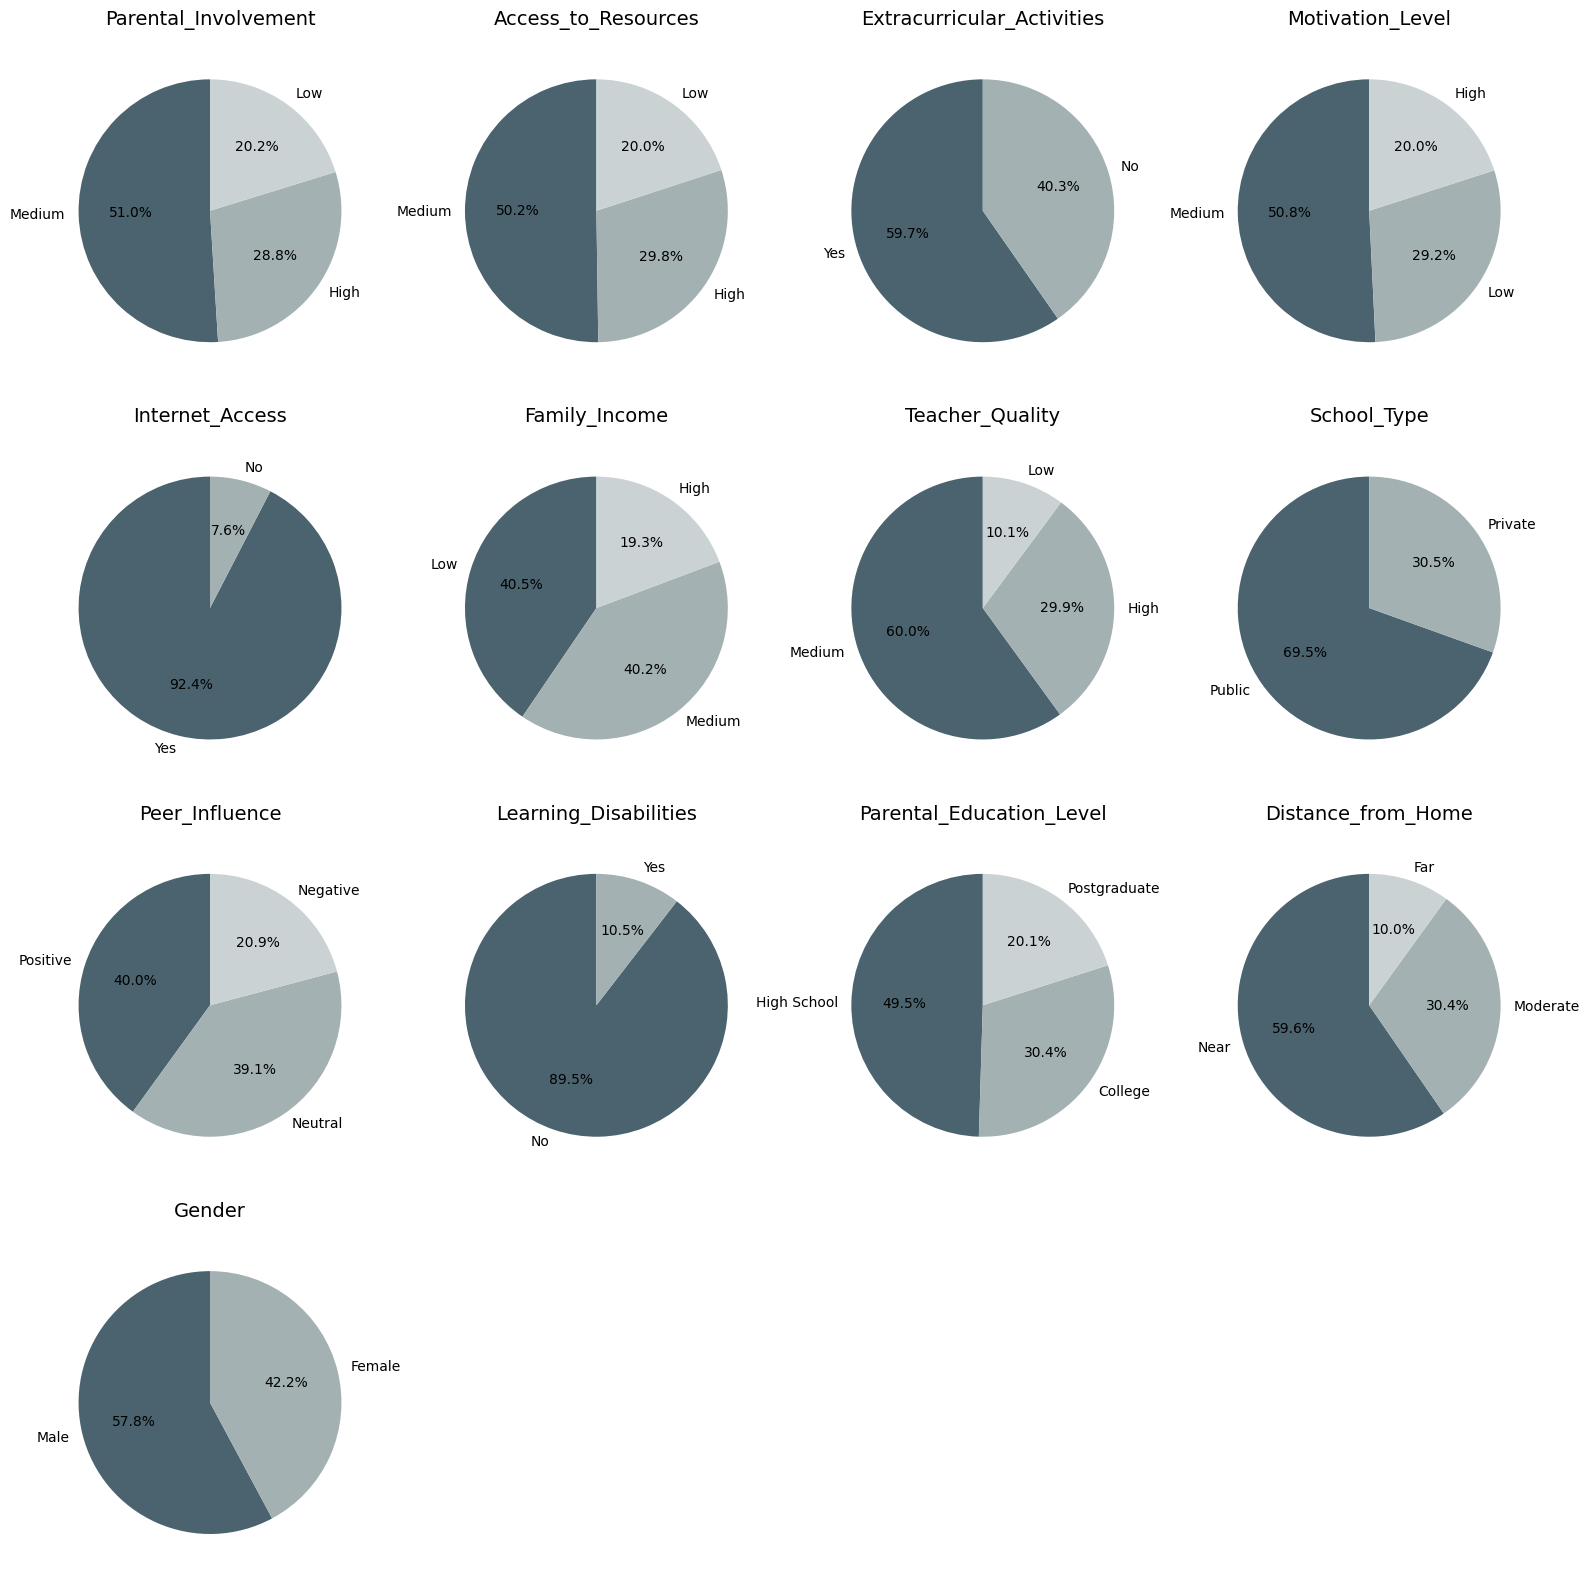

In [22]:
# Vẽ biểu đồ phân bố giá trị của các cột
numerical_fig, numerical_axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
numerical_axes = numerical_axes.flatten()

plot_count = 0

colors = ['#4A636E', '#A3B1B3','#CAD2D3', '#2B4D60', '#7D7D7D']

for column, distribution in cat_distribution.items():
    if plot_count >= 16:
        break

    labels = list(distribution.keys())
    counts = list(distribution.values())

    numerical_axes[plot_count].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    numerical_axes[plot_count].axis('equal') 
    numerical_axes[plot_count].set_title(f'{column}', fontsize=14)

    plot_count += 1

for i in range(plot_count, 16):
    numerical_fig.delaxes(numerical_axes[i])

plt.tight_layout()
plt.show()

Sau các bước tiền xử lý, ta thực hiện lưu dataframe này vào 1 file mới và thực hiện các trực quan hóa trên file này.

In [23]:
df.to_csv('../Data/StudentPerformanceFactors_clean.csv', index=False)